# Pendahuluan

Dalam tugas kali ini, Anda diminta untuk melakukan EDA pada [dataset "Housing Price"](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) menggunakan teknik visualisasi 1D dan 2D. Dataset "Housing Price" berisi berbagai informasi mengenai properti-properti yang dijual, misalnya zona lokasi, jumlah kamar tidur, ukuran tanah, dll.

# Data Preparation

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Import data 
house = pd.read_csv('/Users/Rina/Documents/Case Study 02/train_house.csv', index_col=0)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Drop variabel NaN
house = house.dropna(axis=1)
house.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [4]:
# Memisahkan data numerikal 
num_cols = house._get_numeric_data().columns
house_numeric = house[num_cols]
house_numeric.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
2,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
3,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
4,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
5,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000


In [5]:
# Memisahkan data kategorikal
house_categorical = house.drop(num_cols, axis = 1)
house_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal


In [6]:
house_numeric.to_csv('house_numeric.csv')

In [7]:
house_categorical.to_csv('house_categorical.csv')

# 1D Visualization 

## Soal 1

1. Buatlah visualisasi barplot dan analisis untuk variabel kategorikal:
    * `Utilities`
    * `HouseStyle`
    * `ExterQual` 

2. Buatlah visualisasi histogram dan analisis untuk variabel numerikal:
    * `SalePrice`
    * `GrLivArea`
    * `PoolArea`

3. Terapkan pemrosesan data yang sesuai untuk masing-masing variabel dan tulis penjelasan serta analisisnya!

## Variabel Kategorikal

### Utilities

* `Utilities` berisi informasi mengenai fasilitas apa saja yang tersedia di properti tersebut
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSeWa	Electricity and Gas Only	

<Axes: ylabel='Utilities'>

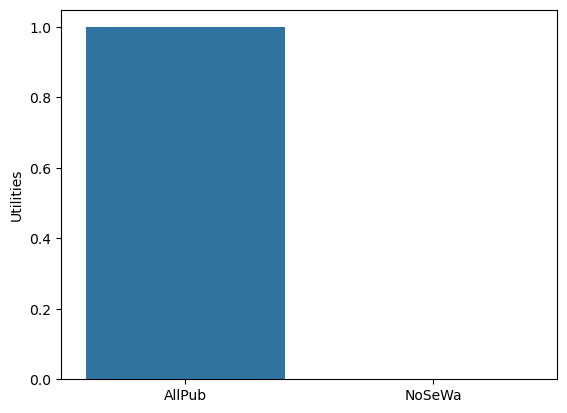

In [8]:
sns.barplot(x=house_categorical['Utilities'].value_counts().index,
                 y=house_categorical['Utilities'].value_counts(normalize = True))

### HouseStyle

HouseStyle: Style properti (misal: 1 lantai, 2 lantai, dst)
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

<Axes: ylabel='HouseStyle'>

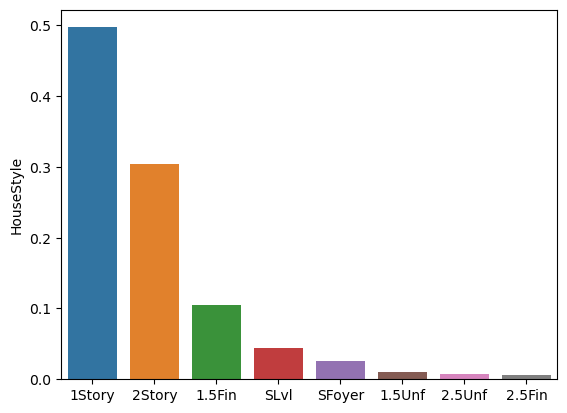

In [9]:
sns.barplot(x=house_categorical['HouseStyle'].value_counts().index,
                 y=house_categorical['HouseStyle'].value_counts(normalize = True))

### ExterQual

ExterQual: Kualitas material eksterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair

<Axes: ylabel='ExterQual'>

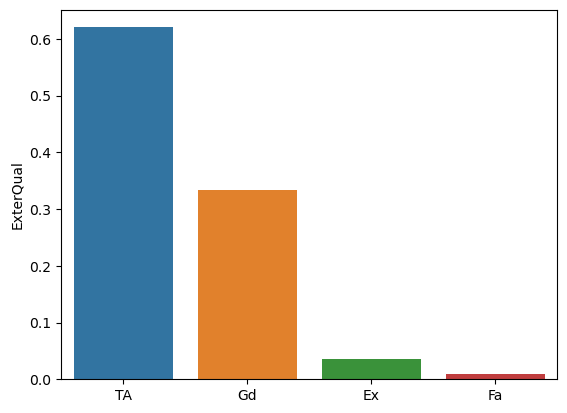

In [10]:
sns.barplot(x=house_categorical['ExterQual'].value_counts().index,
                 y=house_categorical['ExterQual'].value_counts(normalize = True))

In [11]:
house_categorical['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

#### **Analisis tentang variabel `SalePrice`**

Utilities: fasilitas property
* Hampir keseluruahan fasilitas property adalah all pub.
* Property dengan fasilitas No Sewa hanya ada 1.
* Apakah property dengan fasilitas No Sewa sulit menarik konsumen dan kenapa ?

HouseStyle : Bentuk property
* Sebaran datanya Right-Skewed
* Property dengan lantai 1 lebih banyak dibandingkan yang lain
* Apakah jumlah lantai bangunan berpengaruh terhadap harga property ?

ExterQual : Kualitas Materi Eksterior
* Distribusi Right-Skewed
* Grade terbaik adalah excellent namun property dengan kualitas eksterior rata-rata paling banyak.
* Apakah kualitas materi eksterior bangunan berpengaruh terhadap harga property ?

## Variabel Numerikal

### SalePrice

* SalePrice merupakan variabel target yang ingin diprediksi
* Secara fisik, ini berarti harga properti yang dijual

C:\Users\Rina\AppData\Local\Temp\ipykernel_10488\621993708.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name, bins = 100)


Median: 163000.0
Mean: 180921.19589041095
Std Dev: 79442.50288288663


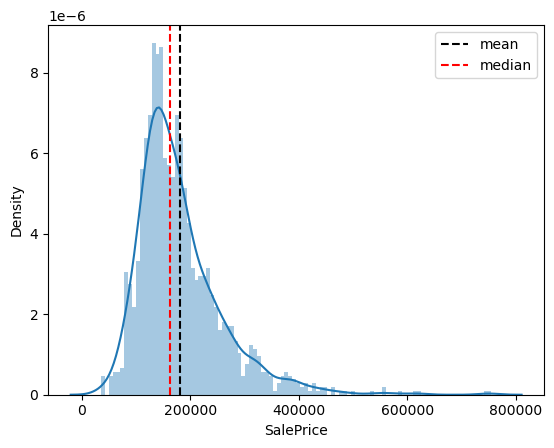

In [12]:
x = house_numeric["SalePrice"]
sns.distplot(x, axlabel=x.name, bins = 100)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

#### **Analisis tentang variabel `SalePrice`**

* Distribusi right skewed
* Range harga 100,000 sampai dengan 300,000. Apakah harga rumah ini sudah sesuai dengan pasaran harga ?
* Karena ini adalah harga jual secara fisik maka nilai akan selalu positif. Namun jika dimasukan kemodel ML hasil prediksi bisa jadi negatif jika salah.
* Transformasi dengan logscale
   * Membuat distribusi terlihat seperti distribusi normal
   * Memaksa nilai harga selalu positif, bahkan ketika dimasukan kedalam model

C:\Users\Rina\AppData\Local\Temp\ipykernel_10488\1955607400.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name)


Median: 5.212187604403958
Mean: 5.221978956475628
Std Dev: 0.17347974217176843


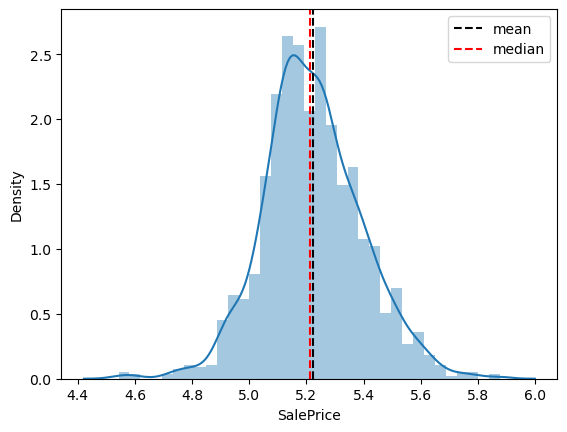

In [13]:
x = np.log10(house_numeric["SalePrice"])
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

### GrLivArea

* GrLivArea berisi informasi mengenai luas area tinggal di atas permukaan tanah (tidak termasuk basement)
* Satuan yang digunakan adalah *square feet*

C:\Users\Rina\AppData\Local\Temp\ipykernel_10488\1426339083.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name, bins = 100)


Median: 1464.0
Mean: 1515.463698630137
Std Dev: 525.4803834232027


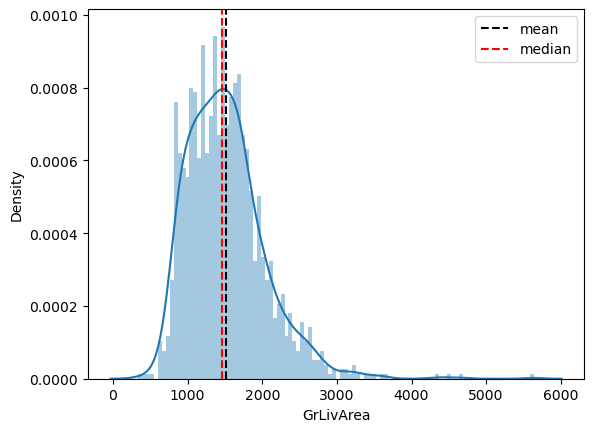

In [14]:
x = house_numeric["GrLivArea"]
sns.distplot(x, axlabel=x.name, bins = 100)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

#### **Analisis tentang variabel `GrlivArea`**

* Distribusi Right Skewed
* Terdapat anomali dengan nilai yang cukup tinggi
* Terdapat 2 pendekatan untuk melakukan analisis :
  * Transformasi menjadi log10
  * Drop Outlier

#### Transformasi menjadi Log10 



C:\Users\Rina\AppData\Local\Temp\ipykernel_10488\4100260798.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name, bins = 30)


Median: 3.165541076722373
Mean: 3.156354310389778
Std Dev: 0.14485910869663873


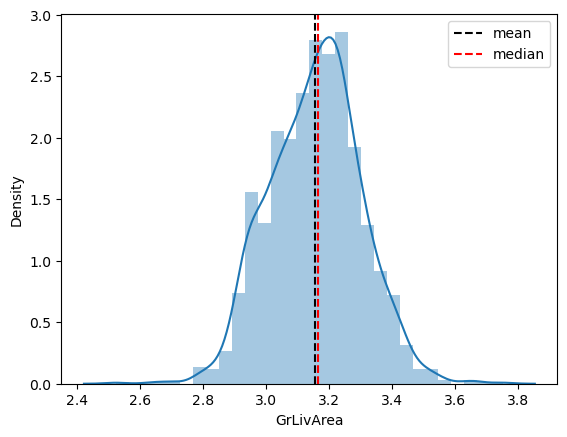

In [15]:
x = np.log10(house_numeric["GrLivArea"])
sns.distplot(x, axlabel=x.name, bins = 30)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

#### Drop OutLier 



C:\Users\Rina\AppData\Local\Temp\ipykernel_10488\4022242866.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name, bins = 30)


Median: 1464.0
Mean: 1515.463698630137
Std Dev: 525.4803834232027


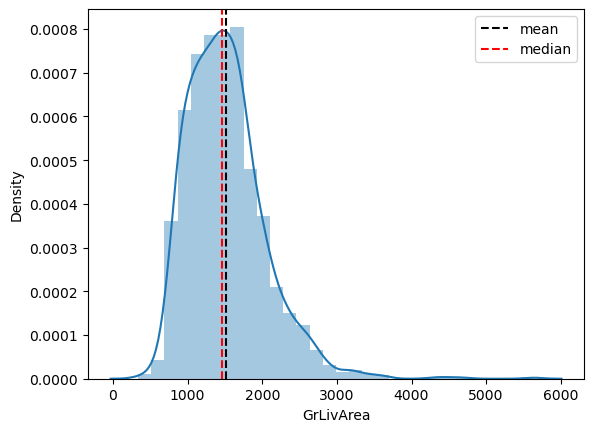

In [16]:
x = house_numeric["GrLivArea"][house_numeric["GrLivArea"] < 30000]
sns.distplot(x, axlabel=x.name, bins = 30)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

### GarageArea

* GarageArea berisi informasi mengenai luas garasi (jika ada)
* Satuan yang digunakan adalah *square feet*

C:\Users\Rina\AppData\Local\Temp\ipykernel_10308\1099879454.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name, bins = 100)


Median: 480.0
Mean: 472.9801369863014
Std Dev: 213.80484145338076


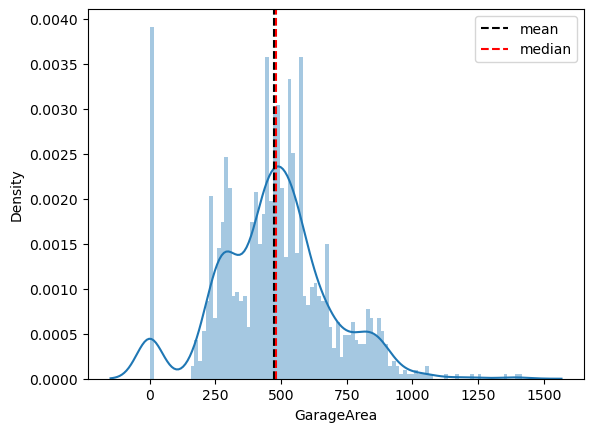

In [14]:
x = house_numeric["GarageArea"]
sns.distplot(x, axlabel=x.name, bins = 100)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

#### **Analisis tentang variabel `GarageArea`**

* Cukup Banyak Nilai didekat 0
* Dapat dicek untuk memastikan apakah nilai tersebut benar 0 atau hanya mendekati 0

In [20]:
print('number of nonzero values:',np.sum(house_numeric['GarageArea'] != 0))
print('number of zero values:',np.sum(house_numeric['GarageArea'] == 0))

number of nonzero values: 1379
number of zero values: 81


#### **Analisis tentang variabel `GarageArea`**

* Cukup Banyak Nilai  0
* Ternyata tidak semua rumah mempunyai GarageArea
* Action dengan membuat 2 kluster yaitu :
   * kluster rumah dengan GarageArea
   * kluster rumah tanpa GarageArea
   

C:\Users\Rina\AppData\Local\Temp\ipykernel_11744\39361327.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name, bins = 20)


Median: 484.0
Mean: 500.76214648295866
Std Dev: 185.68051979433156


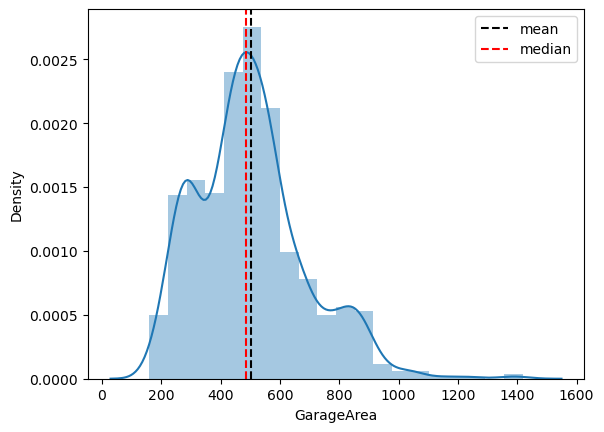

In [23]:
x = house_numeric['GarageArea'][house_numeric['GarageArea'] != 0]
sns.distplot(x, axlabel=x.name, bins = 20)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

## Pemrosesan Data Variabel Numerikal

C:\Users\Rina\AppData\Local\Temp\ipykernel_11744\973831864.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name, bins = 30)


Median: 5.212187604403958
Mean: 5.221978956475628
Std Dev: 0.17347974217176843


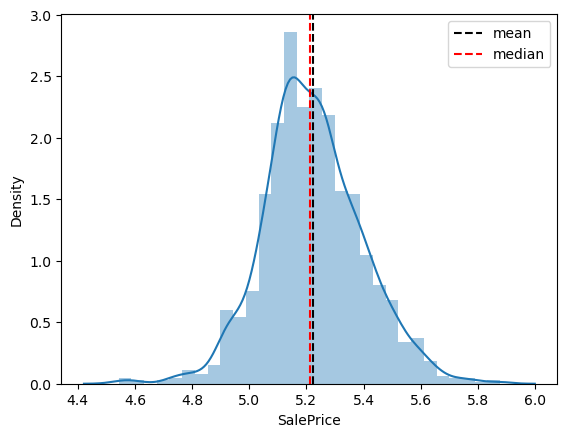

In [26]:
# Transformasi log-10 SalePrice

x = np.log10(house_numeric["SalePrice"])
sns.distplot(x, axlabel=x.name, bins = 30)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

C:\Users\Rina\AppData\Local\Temp\ipykernel_11744\2875038352.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name, bins = 30)


Median: 3.165541076722373
Mean: 3.156354310389778
Std Dev: 0.14485910869663873


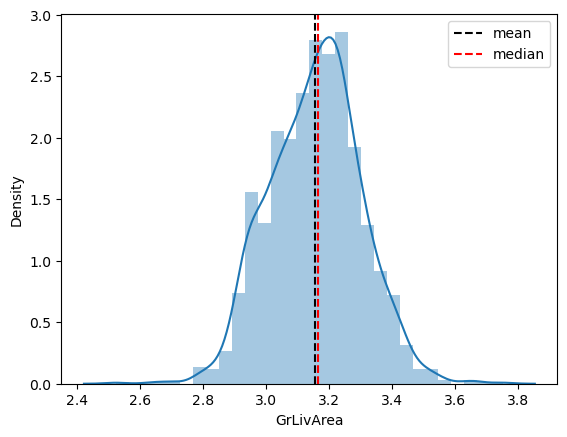

In [27]:
# Transformasi log-10 GrLivArea

x = np.log10(house_numeric["GrLivArea"])
sns.distplot(x, axlabel=x.name, bins = 30)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

In [17]:
print('number of nonzero values:',np.sum(house_numeric['GarageArea'] != 0))
print('number of zero values:',np.sum(house_numeric['GarageArea'] == 0))

number of nonzero values: 1379
number of zero values: 81


C:\Users\Rina\AppData\Local\Temp\ipykernel_11744\1581473358.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name, bins = 20)


Median: 484.0
Mean: 500.76214648295866
Std Dev: 185.68051979433156


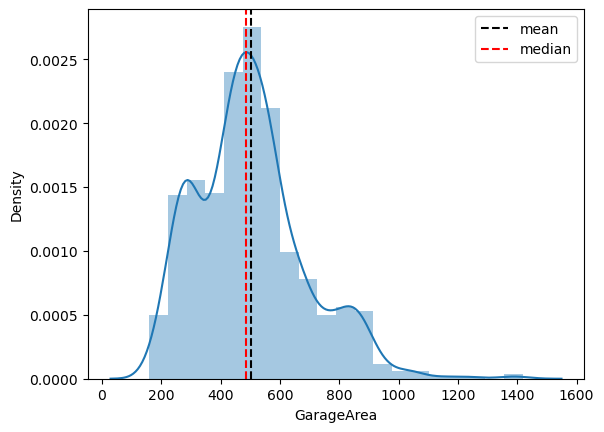

In [31]:
# Menghilangkan nilai nol pada GarageArea

x = house_numeric['GarageArea'][house_numeric['GarageArea'] != 0]
sns.distplot(x, axlabel=x.name, bins = 20)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

## Soal 2

1. Buat visualisasi tentang hubungan antara:
    * `GrLivArea` dengan `SalePrice`
    * `GarageArea` dengan `SalePrice`

2. Buat hipotesis Anda tentang hubungan antar-variabel

#### **Penjelasan dan analisis tentang pemrosesan data**

* Terdapat anomali dengan nilai yang sangat tinggi pada Sale Price sehingga dilakukan Transformasi log-10
* Terdapat anomali dengan nilai yang sangat tinggi pada GrLivArea sehingga dilakukan Transformasi log-10
* Terdapat nilai nol yang cukup tinggi pada Garage Area sebanyak 81 sehingga dilakukan DropOutlier untuk menghilangkan nilai nol
* Dengan melakukan Transformasi skala atau menghapus anomali distribusi lebih mendekati distribusi normal

# 2D Visualization

## Soal 2

1. Buat visualisasi tentang hubungan antara:
    * `GrLivArea` dengan `SalePrice`
    * `GarageArea` dengan `SalePrice`

2. Buat hipotesis Anda tentang hubungan antar-variabel

# `GrLivArea` dengan `SalePrice`

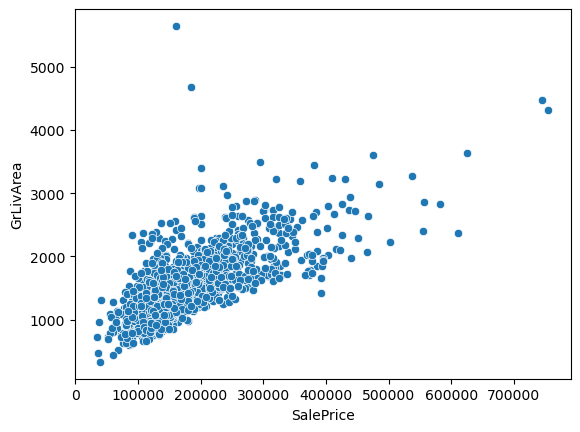

In [22]:
ax = sns.scatterplot(y="GrLivArea", x="SalePrice", data=house_numeric)
plt.show()

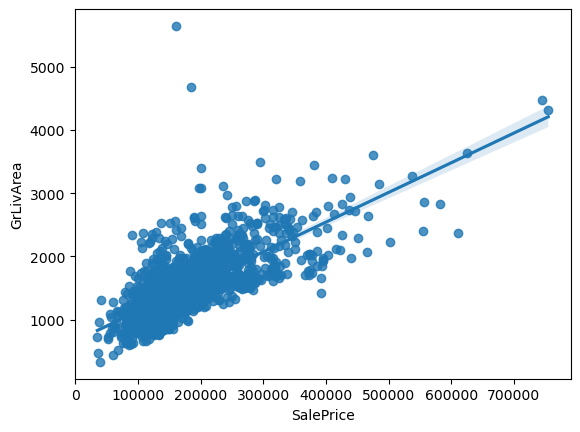

In [26]:
ax = sns.regplot(y="GrLivArea", x="SalePrice", data=house_numeric)
plt.show()

# `GarageArea` dengan `SalePrice`

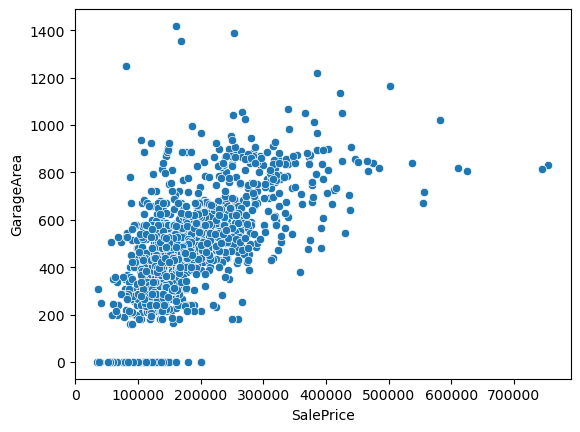

In [23]:
ax = sns.scatterplot(y="GarageArea", x="SalePrice", data=house_numeric)
plt.show()

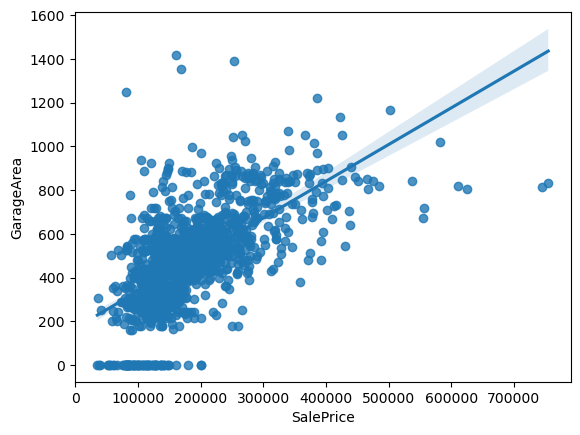

In [27]:
ax = sns.regplot(y="GarageArea", x="SalePrice", data=house_numeric)
plt.show()

#### **Hipotesis tentang hubungan antar-variabel**

* Variabel SalePrice memiliki korelasi positif dengan variabel GarageArea
* Variabel SalePrice memiliki korelasi positif dengan variabel GrLivArea
* Korelasi positif yang terjadi dapat kita lihat dari sebaran data dan diperkuat dengan trendline data 